In [1]:
from PIL import Image
import pytesseract

## Text Recognition

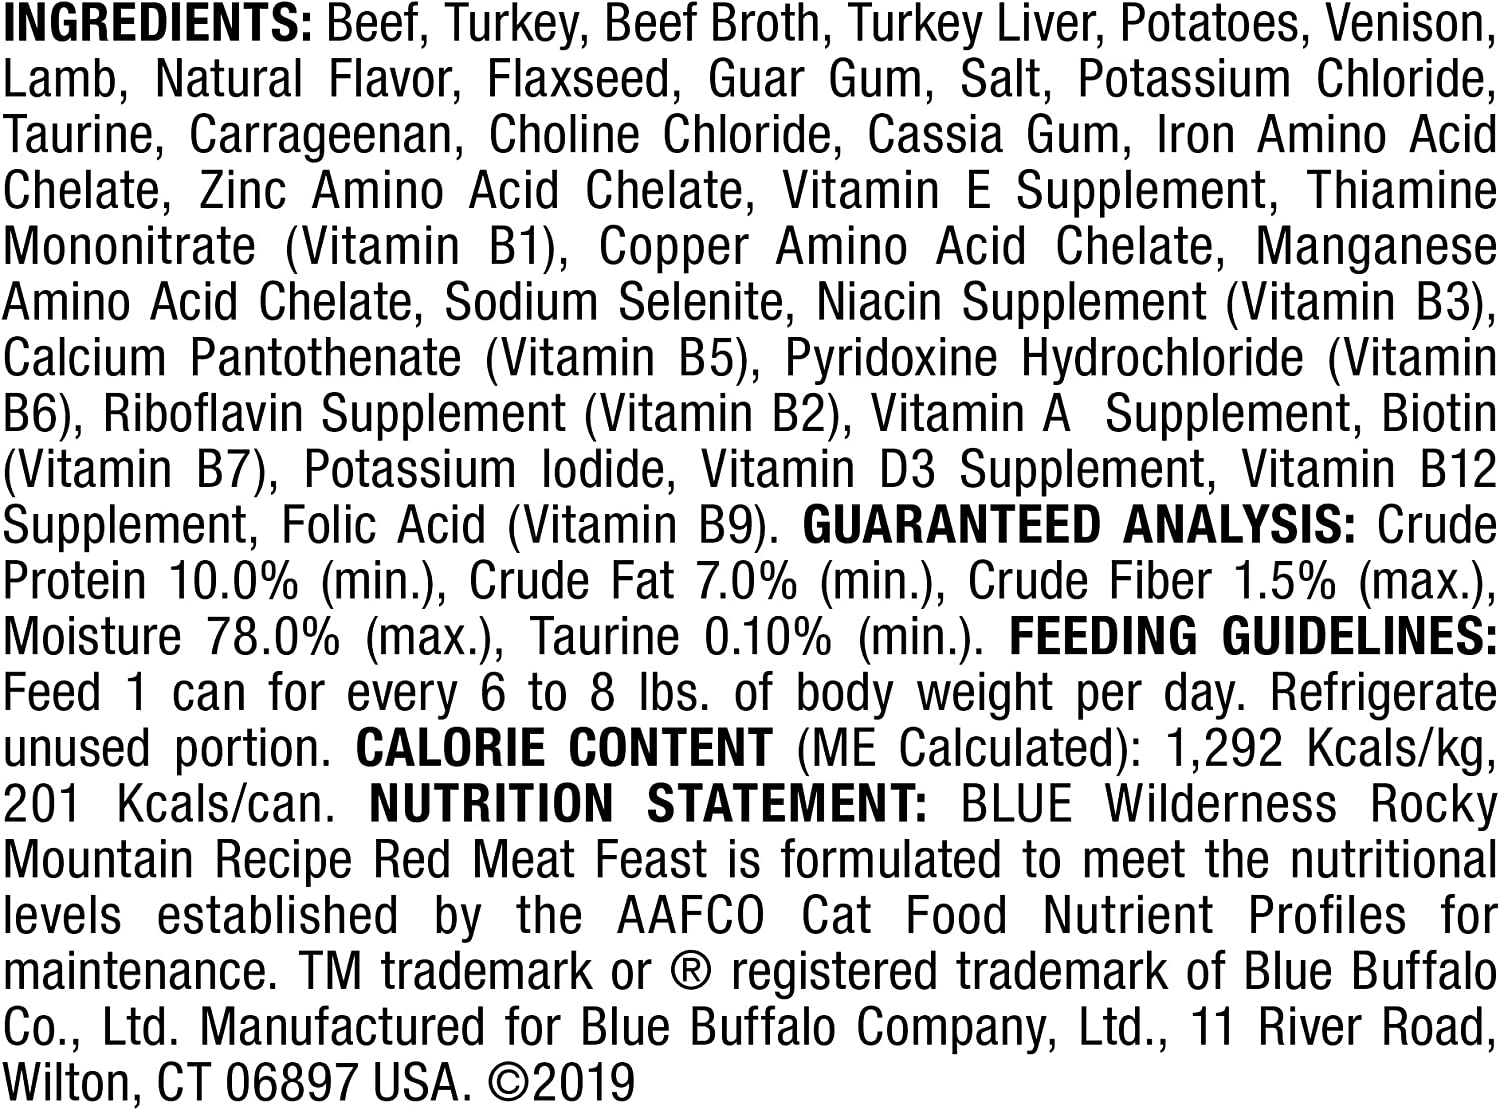

In [3]:
Image.open("petfood/cat33.jpg")

In [ ]:
pytesseract.pytesseract.tesseract_cmd = '/usr/local/bin/tesseract'
content = pytesseract.image_to_string(Image.open("petfood/cat33.jpg"))

In [6]:
print(content)

INGREDIENTS: Beef, Turkey, Beef Broth, Turkey Liver, Potatoes, Venison,
Lamb, Natural Flavor, Flaxseed, Guar Gum, Salt, Potassium Chloride,
Taurine, Carrageenan, Choline Chloride, Cassia Gum, Iron Amino Acid
Chelate, Zinc Amino Acid Chelate, Vitamin E Supplement, Thiamine
Mononitrate (Vitamin B1), Copper Amino Acid Chelate, Manganese
Amino Acid Chelate, Sodium Selenite, Niacin Supplement (Vitamin B3),
Calcium Pantothenate (Vitamin B5), Pyridoxine Hydrochloride (Vitamin
B6), Riboflavin Supplement (Vitamin B2), Vitamin A Supplement, Biotin
(Vitamin B7), Potassium lodide, Vitamin D3 Supplement, Vitamin B12
Supplement, Folic Acid (Vitamin B9). GUARANTEED ANALYSIS: Crude
Protein 10.0% (min.), Crude Fat 7.0% (min.), Crude Fiber 1.5% (max.),
Moisture 78.0% (max.), Taurine 0.10% (min.). FEEDING GUIDELINES:
Feed 1 can for every 6 to 8 lbs. of body weight per day. Refrigerate
unused portion. CALORIE CONTENT (ME Calculated): 1,292 Kcals/kg,
201 Kcals/can. NUTRITION STATEMENT: BLUE Wilderness Rock

## Keyword Extraction

In [ ]:
from keybert import KeyBERT

kw_model = KeyBERT()

In [10]:
kw_model.extract_keywords(content, keyphrase_ngram_range=(1, 4),  use_mmr=True, diversity=0.7, top_n=5)

[('ingredients beef turkey', 0.5894),
 ('vitamin b9 guaranteed analysis', 0.3423),
 ('feeding guidelines feed lbs', 0.2506),
 ('blue wilderness rocky', 0.1337),
 ('potassium chloride', 0.2458)]

In [11]:
import yake

kw_extractor = yake.KeywordExtractor(dedupLim= 0.5,top= 5)

In [12]:
kw_extractor.extract_keywords(content)

[('Beef Broth', 0.0038952617792384105),
 ('Turkey Liver', 0.0038952617792384105),
 ('Amino Acid Chelate', 0.004572391876902759),
 ('Iron Amino Acid', 0.01781315316406169),
 ('Vitamin', 0.019824890834276434)]

## String Pattern Matching

In [13]:
doc = content.lower()
doc= doc.split('guaranteed analysis')[1]
doc = doc.strip() 
if doc.startswith(":"):
    doc = doc[1:]
doc_key = doc.rsplit('%',1)[0] + str('%')
doc_after = doc.rsplit('%',1)[1]
doc_after = doc_after.strip()
if doc_after.startswith("(min)"):
    doc_key += str(' (min)')    
print(doc_key)
print('_________________')

 crude
protein 10.0% (min.), crude fat 7.0% (min.), crude fiber 1.5% (max.),
moisture 78.0% (max.), taurine 0.10%
_________________
